### Play with cifar10
Download cifar10:

[cifar10 download](https://www.cs.toronto.edu/~kriz/cifar.html)

In [33]:
import pickle as cPickle #
import numpy as np
import os

CIFAR_DIR = "../../../other_datasets/cifar-10-batches-py"
print(os.listdir(CIFAR_DIR)) #看CIFAR_DIR这个文件夹下有什么内容

['data_batch_1', '.DS_Store', 'readme.html', 'batches.meta', 'data_batch_2', 'data_batch_5', 'test_batch', 'data_batch_4', 'data_batch_3']


In [6]:
#用with语句来打开文件，之后直接使用as f中的f
with open(os.path.join(CIFAR_DIR, "data_batch_1"), 'rb') as f:
    print("f:",f)
    data = cPickle.load(f, encoding='latin1')
    print("type(data):",type(data))
    print(data.keys())


f: <_io.BufferedReader name='./cifar-10-batches-py/data_batch_1'>
type(data): <class 'dict'>
dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [15]:
for key in data.keys():
    print("key:", key,"\ttype:",type(data[key]))

key: batch_label 	type: <class 'str'>
key: labels 	type: <class 'list'>
key: data 	type: <class 'numpy.ndarray'>
key: filenames 	type: <class 'list'>


### data
1. numpy.ndarray
2. 有10k个数据，每个有1024 * 3个特征
3. 1024 = 32 * 32, 所以是32行32列的正方形
4. 每个特征的值是0 - 255

In [19]:
print(data['data'].shape)
print(data['data'][0:2])

(10000, 3072)
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]]


### labels
1. list
2. 有10个类的物品
![cifar labels](./others/cifar-class.png)

In [20]:
print(data['labels'][0:2])

[6, 9]


### batch_label
五个batch的第几个

In [21]:
print(data['batch_label'])

training batch 1 of 5


### filenames
每张图片的名字

In [23]:
print(data['filenames'][0:2])

['leptodactylus_pentadactylus_s_000004.png', 'camion_s_000148.png']


### 如何将数据转换成图像
数据的生成：
1. 文档描述中，是分别将R，G，B三个通道的32 * 32 压缩成1维，也就是R先压缩成 1 * 1024
2. G压缩成 1 * 1024, B压缩成 1 * 1024
3. 最后这三个 1 * 1024 连接起来

图片的反解析：
1. 所以我们拿到数据，先切成3份，也就是一个通道的像素
2. 接着切32份，也就是某一行的
3. 但是我们现在获取的是 3 * 32 * 32, 可是我们要绘制图片的时候，matplotlib.pyplot的imshow需要的是 32 * 32 * 3
4. 所以先reshape成 3 * 32 * 32, 再transpose 32 * 32 * 3

In [24]:
#获取第100张图片
image_arr = data['data'][100]
image_arr = image_arr.reshape([3, 32, -1]) #相当于 image_arr.reshape([3, 32, 32])

In [25]:
image_arr = image_arr.transpose((1,2,0)) 
#最前面的维度是 之前的第1个维度
#中间的维度是 之前的第2个维度
#最后面的维度是 之前的第0个维度

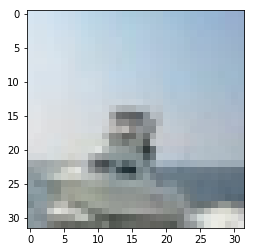

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

imshow(image_arr) #这个就可以打印图片：image show

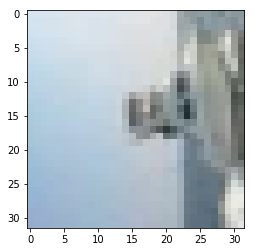

In [32]:
image_arr = image_arr.transpose((1,2,0)) 
imshow(image_arr) #这个就可以打印图片：image show